In [ ]:
'''
AI Assignment 1: Data Prep & Data Analysis
Nana Kwaku Amoako
Tue 28 May, 2024
'''

'\nAI Assignment 1: Data Prep & Data Analysis\nNana Kwaku Amoako\nTue 28 May, 2024\n'

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [ ]:
# Get URL of wikipedia page with data
url = "https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States"
page = requests.get(url)

In [ ]:
# test that page is loaded successfully
page.status_code

200

In [ ]:
# # parse page
soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
# find the table in the webpage
table = soup.find('table', {'class': 'wikitable'})

In [ ]:
# read table data into pandas DataFrame
df = pd.read_html(str(table))[0]

### Question 1

In [ ]:
# view that page read into df
df.head(46)

,No.[a],Portrait,Name (Birth–Death),Term[14],Party[b][15],Party[b][15].1,Election,Vice President[16]
0,1,NaN,George Washington (1732–1799) [17],"April 30, 1789 – March 4, 1797",NaN,Unaffiliated,1788–1789 1792,John Adams[c]
1,2,NaN,John Adams (1735–1826) [19],"March 4, 1797 – March 4, 1801",NaN,Federalist,1796,Thomas Jefferson[d]
2,3,NaN,Thomas Jefferson (1743–1826) [21],"March 4, 1801 – March 4, 1809",NaN,Democratic- Republican,1800 1804,Aaron Burr George Clinton
3,4,NaN,James Madison (1751–1836) [22],"March 4, 1809 – March 4, 1817",NaN,Democratic- Republican,1808 1812,"George Clinton[e] Vacant after April 20, 1812 ..."
4,5,NaN,James Monroe (1758–1831) [24],"March 4, 1817 – March 4, 1825",NaN,Democratic- Republican,1816 1820,Daniel D. Tompkins
5,6,NaN,John Quincy Adams (1767–1848) [25],"March 4, 1825 – March 4, 1829",NaN,Democratic- Republican[f] National Republican,1824,John C. Calhoun[g]
6,7,NaN,Andrew Jackson (1767–1845) [28],"March 4, 1829 – March 4, 1837",NaN,Democratic,1828 1832,"John C. Calhoun[h] Vacant after December 28, 1..."
7,8,NaN,Martin Van Buren (1782–1862) [29],"March 4, 1837 – March 4, 1841",NaN,Democratic,1836,Richard Mentor Johnson
8,9,NaN,William Henry Harrison (1773–1841) [30],"March 4, 1841 – April 4, 1841[e]",NaN,Whig,1840,John Tyler
9,10,NaN,John Tyler (1790–1862) [31],"April 4, 1841[i] – March 4, 1845",NaN,Whig[j] Unaffiliated,–,Vacant throughout presidency


### DATA CLEANING

In [ ]:
# make a new birthyear column
# Initialize the Birth Year column with None
df['Birth Year'] = None

for index, row in df.iterrows():
    name_birth_death = row['Name (Birth–Death)']
    if 'b. ' in name_birth_death:
        birth_year = name_birth_death.split('b. ')[1].split(')')[0].strip()
    else:
        birth_year = name_birth_death.split('(')[1].split('–')[0].strip()

    df.at[index, 'Birth Year'] = birth_year

In [ ]:
# make a death year column
df['Death Year'] = df['Name (Birth–Death)'].str.extract(r'[–-](\d{4})\)')
df['Death Year'].fillna('Alive', inplace=True)

In [ ]:
# make the name column just names
df['Name'] = df['Name (Birth–Death)'].str.replace(r'\s*\(.*\)\s*', '', regex=True)


In [ ]:
# drop the old name column
df.drop(columns=['Name (Birth–Death)'], inplace=True)

In [ ]:
# drop the 'Portrait' column
df.columns = df.columns.str.strip() # clean trailing whitespaces
df.drop(columns=['Portrait'], axis=0, inplace=True)

In [ ]:
# drop party[b][15] column
df.columns = df.columns.str.strip() # clean trailing whitespaces
df.drop(columns=['Party[b][15]'], axis=0, inplace=True)

In [ ]:
# drop No.[a] column
df.drop(columns=['No.[a]'], axis=0, inplace=True)

In [ ]:
df['Name'] = df['Name'].str.split('[').str[0].str.strip()

In [ ]:
df['Vice President'] = df['Vice President[16]'].str.split('[').str[0].str.strip()
# drop old column
df = df.drop('Vice President[16]', axis=1)

In [ ]:
df['Party'] = df['Party[b][15].1'].str.split('[').str[0].str.strip()
# drop old column
df = df.drop('Party[b][15].1', axis=1)

In [ ]:
df['Term'] = df['Term[14]'].str.split('[').str[0].str.strip()
# drop old column
df = df.drop('Term[14]', axis=1)

In [ ]:
# fill na's in election column
df.replace('–', np.nan, inplace=True)
df['Election'].fillna('No Election', inplace=True)

adding year entered and left office

In [ ]:
from datetime import datetime

# define date format
date = "%B %d, %Y"

# initialize lists to hold the new column data
years_entered_office = []
years_left_office = []

In [ ]:
# loop through terms to extract start and end years
for term in df['Term']:
    try:
        # split term into start and end date
        start_date, end_date = term.split(" – ")
        start = datetime.strptime(start_date.strip(), date)
        years_entered_office.append(start.year)

        # incumbent workaround
        if end_date.strip() == 'Incumbent':
            end = datetime.now()
        else:
            end = datetime.strptime(end_date.strip(), date)
        years_left_office.append(end.year)
    except ValueError:
        # handle terms with only one date - start
        start = datetime.strptime(term.strip(), date)
        years_entered_office.append(start.year)
        years_left_office.append(None)

In [ ]:
# display
df['year entered office'] = years_entered_office
df['year left office'] = years_left_office

### Question 2: How many presidents are on the web page ?

In [ ]:
# 2: Presidents on webpage
presidents_num = df['Name'].nunique()
print(f"The number of presidents on the webpage is: {presidents_num}")

The number of presidents on the webpage is: 45


### Question 3: How many presidencies ever existed in the United states ?

In [ ]:
# 3: Presidencies existing in the US
presidencies_num = len(df)
print(f"The number of presidencies in the US is: {presidencies_num}")

The number of presidencies in the US is: 46


### Question 4: Which presidents served more than one term and had only one vice president for the whole duration of their presidency?

Cleaning vp column further

In [ ]:
# 4: More than one term
from datetime import datetime

# date format
date = "%B %d, %Y"

years_in_office = []

# loop through terms to calculate how long mandem been in office
for i in range(len(df['Term'])):
    # get start and end date
    try:
        term = df['Term'][i] # Term will be the index we are traversing at
        start_date, end_date = term.split(" – ")
        start = datetime.strptime(start_date.strip(), date) # convert to datetime object

        # incumbent workaround
        if end_date.strip() == 'Incumbent':
            end = datetime.now()
        else:
            end = datetime.strptime(end_date.strip(), date)


        # calculating years in office
        office_years = (end.year - start.year)
        years_in_office.append(office_years) # adding the years in office to the list
    except ValueError:
        # terms with no end date
        start = datetime.strptime(term.strip(), date)   # take the start date from the row as it is

        # logic: use start date of next term
        # i, i+1

        if i+1 < len(df['Term']):
            next_term = df['Term'][i+1]
            next_start_date, _ = next_term.split(" – ")
            end = datetime.strptime(next_start_date.strip(), date)
        else:
            end = datetime.now()

        office_years = (end.year - start.year)
        years_in_office.append(office_years) # adding the years in office to the list

In [ ]:
# add years_in_office df
df['Years in Office'] = years_in_office

In [ ]:
vp_list = []

for vp in df['Vice President']:
    if 'Vacant' in vp:
        if 'through' in vp:
            # handle partial vacancies
            parts = vp.split('through')
            date = parts[1].split()[:3]
            remaining_vp = ' '.join(parts[1].split()[3:])
            vp_list.append(f"Vacant through {' '.join(date)} - {remaining_vp}")
        else:
            # handle complete vacancies
            vp_list.append('Vacant throughout presidency')
    else:
        # split names
        vp_names = vp.split()
        if len(vp_names) > 3:
            vp_list.append(' - '.join([' '.join(vp_names[:3]), ' '.join(vp_names[3:])]))
        elif len(vp_names) == 4:
            vp_list.append(' - '.join([' '.join(vp_names[:2]), ' '.join(vp_names[2:])]))
        else:
            vp_list.append(' '.join(vp_names))


df['VP'] = vp_list

In [ ]:
# new column with the vice presidents who served more than once

df['VP'] = ''
df['VP more than once'] = ''

for i in range(len(df)):
    if df['Years in Office'][i] > 4:
        if 'Vacant' in df['Vice President'][i]:
            df['VP'][i] = 'Vacant'
        else:
            df['VP more than once'][i] = df['Vice President'][i]
    else:
        df['VP'][i] = 'Short' # vice president didn't serve for long


<ipython-input-121-e9bf1b6214b0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VP more than once'][i] = df['Vice President'][i]
<ipython-input-121-e9bf1b6214b0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VP'][i] = 'Short' # vice president didn't serve for long
<ipython-input-121-e9bf1b6214b0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VP more than once'][i] = df['Vice President'][i]
<ipython-input-121-e9bf

In [ ]:
# print stuff

print("Presidents who only served for more than one term: ")
for i in range(len(df)):
    if df['Years in Office'][i] > 4:
        print(df['Name'][i])

Presidents who only served for more than one term: 
George Washington
Thomas Jefferson
James Madison
James Monroe
Andrew Jackson
Ulysses S. Grant
Theodore Roosevelt
Woodrow Wilson
Calvin Coolidge
Franklin D. Roosevelt
Harry S. Truman
Dwight D. Eisenhower
Lyndon B. Johnson
Richard Nixon
Ronald Reagan
Bill Clinton
George W. Bush
Barack Obama


In [ ]:
print("Presidents who only had one VP: ")
for i in range(len(df)):
    if len(df['VP more than once'][i]) > 2:
        print(df['Name'][i])

Presidents who only had one VP: 
George Washington
Thomas Jefferson
James Madison
James Monroe
Andrew Jackson
Ulysses S. Grant
Woodrow Wilson
Franklin D. Roosevelt
Dwight D. Eisenhower
Richard Nixon
Ronald Reagan
Bill Clinton
George W. Bush
Barack Obama


### Question 5: Which president was in office longer than others and when did he get in office?

In [ ]:
max_year = df['Years in Office'].max()
pres_max_year = df[df['Years in Office'] == max_year]['Name'].to_string(index=False)
election_year =  df[df['Years in Office'] == max_year]['Election'].values[0]
election_year_value = election_year.split(' ')[0]

# print(max_year)
# print(pres_max_year)
# print(election_year_value)

print(f"The president who was in the office longest was {pres_max_year} with {max_year} years in office. He got into office in {election_year_value}")

The president who was in the office longest was Franklin D. Roosevelt with 12 years in office. He got into office in 1932


### Question 6: Which presidents were elected after serving as vice presidents?

In [ ]:
# loop through vp list
# if vp name exists in pres list
# print it

# Goal: The code managed to pick the names of the presidents who once served as vice presidents and the periods they served as vice president and president
vp_pres = []

for vp in df['Vice President']:
    for name in df['Name']:
        if name in vp:
            vp_pres.append(vp)


print("The presidents who were elected after serving as vice presidents are:", ', '.join(vp_pres))
print(f"and they are {len(vp_pres)} in number.")

The presidents who were elected after serving as vice presidents are: John Adams, Thomas Jefferson, John Tyler, Millard Fillmore, Hannibal Hamlin Andrew Johnson, Chester A. Arthur, Calvin Coolidge, John Nance Garner Henry A. Wallace Harry S. Truman, Richard Nixon, Lyndon B. Johnson, George H. W. Bush, Joe Biden
and they are 12 in number.


### Question 7: How many presidents were never elected, and what are their names?

In [ ]:
# no election
# picks the president
# prints the presido

no_elect_guys = []

no_elect_guys = df[df['Election'] == 'No Election']['Name'].to_list()

print("The presidents who were never elected are:",', '.join(no_elect_guys))
print(f"and they are {len(no_elect_guys)}")


The presidents who were never elected are: John Tyler, Millard Fillmore, Andrew Johnson, Chester A. Arthur, Gerald Ford
and they are 5


### Question 8: How many presidents have the same forenames and/or surnames and who are they?

In [ ]:
# cleaning
df['Forename'] = df['Name'].str.split().str[0]
df['Surname'] = df['Name'].str.split().str[-1]

In [ ]:
# fisrt name
dupli_fname = df.duplicated(subset=["Forename"], keep=False)
dupli_fname_pres = df[dupli_fname]['Name'].tolist()
print("List of presidents with the same first name:")
print(f"{dupli_fname_pres}")
print(f"and they are {len(dupli_fname_pres)} in number")


List of presidents with the same first name:
['George Washington', 'John Adams', 'James Madison', 'James Monroe', 'John Quincy Adams', 'Andrew Jackson', 'William Henry Harrison', 'John Tyler', 'James K. Polk', 'Franklin Pierce', 'James Buchanan', 'Andrew Johnson', 'James A. Garfield', 'Grover Cleveland', 'Grover Cleveland', 'William McKinley', 'William Howard Taft', 'Franklin D. Roosevelt', 'John F. Kennedy', 'George H. W. Bush', 'George W. Bush']
and they are 21 in number


In [ ]:
# LAST NAME
dupli_lname = df.duplicated(subset=["Surname"], keep=False)
dupli_lname_pres = df[dupli_lname]['Name'].tolist()
print("List of presidents with the same last name:")
print(f"{dupli_lname_pres}")
print(f"and they are {len(dupli_lname_pres)} in number")

List of presidents with the same last name:
['John Adams', 'John Quincy Adams', 'William Henry Harrison', 'Andrew Johnson', 'Grover Cleveland', 'Benjamin Harrison', 'Grover Cleveland', 'Theodore Roosevelt', 'Franklin D. Roosevelt', 'Lyndon B. Johnson', 'George H. W. Bush', 'George W. Bush']
and they are 12 in number


In [ ]:
# displays the presidents with the same first name and their term
print("Presidents with the same first name and the term they served")
df[df['Name'].isin(dupli_fname_pres)][['Name', 'Term']]

Presidents with the same first name and the term they served


,Name,Term
0,George Washington,"April 30, 1789 – March 4, 1797"
1,John Adams,"March 4, 1797 – March 4, 1801"
3,James Madison,"March 4, 1809 – March 4, 1817"
4,James Monroe,"March 4, 1817 – March 4, 1825"
5,John Quincy Adams,"March 4, 1825 – March 4, 1829"
6,Andrew Jackson,"March 4, 1829 – March 4, 1837"
8,William Henry Harrison,"March 4, 1841 – April 4, 1841"
9,John Tyler,"April 4, 1841"
10,James K. Polk,"March 4, 1845 – March 4, 1849"
13,Franklin Pierce,"March 4, 1853 – March 4, 1857"


In [ ]:
print("Presidents with the same first name and the term they served")
df[df['Name'].isin(dupli_lname_pres)][['Name', 'Term']]

Presidents with the same first name and the term they served


,Name,Term
1,John Adams,"March 4, 1797 – March 4, 1801"
5,John Quincy Adams,"March 4, 1825 – March 4, 1829"
8,William Henry Harrison,"March 4, 1841 – April 4, 1841"
16,Andrew Johnson,"April 15, 1865"
21,Grover Cleveland,"March 4, 1885 – March 4, 1889"
22,Benjamin Harrison,"March 4, 1889 – March 4, 1893"
23,Grover Cleveland,"March 4, 1893 – March 4, 1897"
25,Theodore Roosevelt,"September 14, 1901"
31,Franklin D. Roosevelt,"March 4, 1933 – April 12, 1945"
35,Lyndon B. Johnson,"November 22, 1963"


### Question 9: Who was the oldest president ever elected for office?

In [ ]:
oldest_pres = 0
oldest_president = ''
year_entered_office = 0
year_left_office = 0

In [ ]:
for i in range(len(df)):
    election_years = df['Election'][i].split()
    for year in election_years:
        if year.isdigit():  # Check if the election year is a digit
            election_age = int(year) - int(df['Birth Year'][i])
            if election_age > oldest_pres:
                oldest_pres = election_age
                oldest_president = df['Name'][i]
                year_entered_office = df['year entered office'][i]
                year_left_office = df['year left office'][i]

In [ ]:
print(f"The oldest president ever elected for office is {oldest_president} at {oldest_pres} years old.")
print(f"he assumed office in {year_entered_office} and left {int(year_left_office)}")
print(f"Duration of presidency: {int(year_left_office - year_entered_office)} years")


The oldest president ever elected for office is Joe Biden at 78 years old.
he assumed office in 2021 and left 2024
Duration of presidency: 3 years


### Question 10: Who was the youngest president ever elected for office?

In [ ]:
youngest_pres = float('inf')
youngest_president = ''
year_entered_office = 0
year_left_office = 0

In [ ]:
for i in range(len(df)):
    election_years = df['Election'][i].split()
    for year in election_years:
        if year.isdigit():  # Check if the election year is a digit
            election_age = int(year) - int(df['Birth Year'][i])
            if election_age < youngest_pres:
                youngest_pres = election_age
                youngest_president = df['Name'][i]
                young_year_entered_office = df['year entered office'][i]
                young_year_left_office = df['year left office'][i]

In [ ]:
print(f"The oldest president ever elected for office is {youngest_president} at {youngest_pres} years old.")
print(f"he assumed office in {young_year_entered_office} and left {int(young_year_left_office)}")
print(f"Duration of presidency: {int(young_year_left_office - young_year_entered_office)} years")


The oldest president ever elected for office is John F. Kennedy at 43 years old.
he assumed office in 1961 and left 1963
Duration of presidency: 2 years


### Question 11: Which president lived up to a very old age, after leaving office?

In [ ]:
oldest_age = 0
presname = ''
tenure_began = ''
tenure_end = ''

In [ ]:
for i in range(len(df)):
    if (df["Death Year"][i] == 'Alive'):
        df["Death Year"][i] = 0
    else:
        if pd.isna(df["year left office"][i]):
            df["year left office"][i] = 0

        oldest = int(df["Death Year"][i]) - int(df["year left office"][i])
        if oldest > oldest_age:
            oldest_age = oldest
            presname = df['Name'][i]
            tenure_began = df['Election'][i]
            tenure_end = df['year left office'][i]

<ipython-input-139-aeea1c8e9f36>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year left office"][i] = 0
<ipython-input-139-aeea1c8e9f36>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year left office"][i] = 0
<ipython-input-139-aeea1c8e9f36>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year left office"][i] = 0
<ipython-input-139-aeea1c8e9f36>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [ ]:
print(f"Name: {presname}")
print(f"Age: {oldest_age}")
print(f"Year elected: {tenure_began}")
print(f"Year tenure ended: {int(tenure_end)}")


Name: Gerald Ford
Age: 2006
Year elected: No Election
Year tenure ended: 0


### Question 12: Draw a graph that shows the number of presidents and their respective political parties which they came from, and which party have many elected presidents?

In [ ]:
# no of pres
# political parties
# party with the most presidents
import matplotlib.pyplot as plt

In [ ]:
# Presidents and party to plot
presido_party = df[['Name','Party']]

In [ ]:
# Converting to value and counting
count = presido_party.groupby('Party').size()

In [ ]:
count.columns = ['Party','Number of presidents']

In [ ]:
count

Party
Democratic                   16
Democratic- Republican        4
Federalist                    1
National Union                1
Republican                   18
Republican National Union     1
Unaffiliated                  1
Whig                          4
dtype: int64

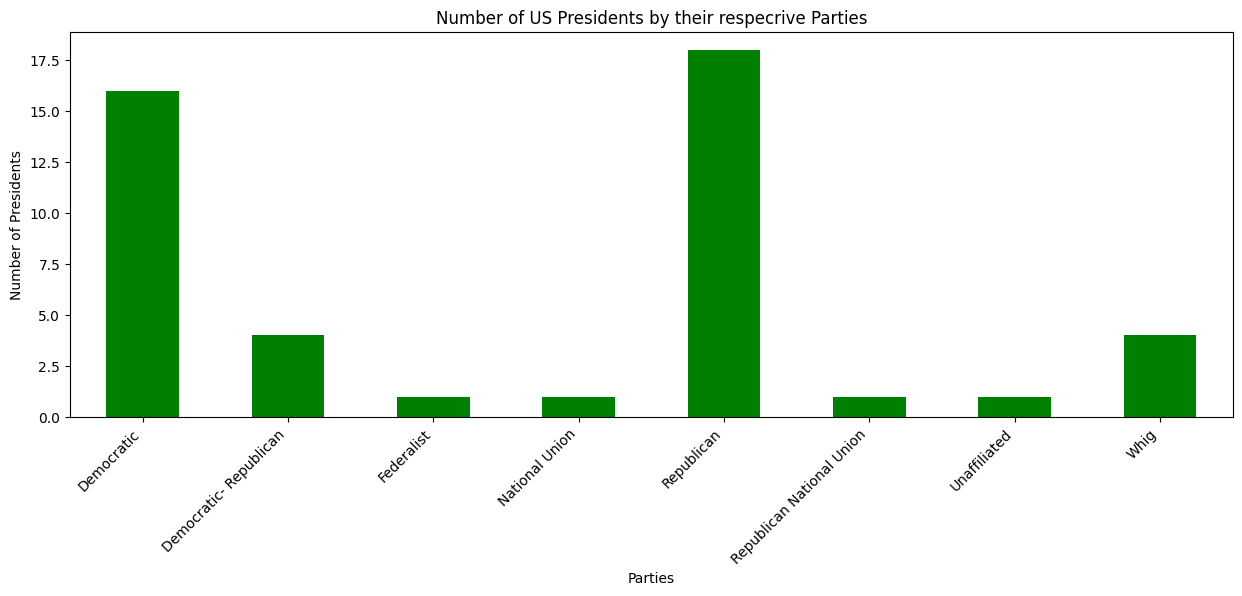

In [ ]:
# scheming and plotting
plt.figure(figsize=(15, 5))

# actually plotting
count.plot(kind='bar', color='green')

# graphing
plt.title('Number of US Presidents by their respecrive Parties')
plt.xlabel('Parties')
plt.ylabel('Number of Presidents')

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()